### Visualize Generated EEGs ###

In [25]:
%matplotlib inline

In [26]:
import torch
import sys
import numpy as np
import mne
from mne.datasets import sample
import matplotlib.pyplot as plt
import h5py

In [27]:
sys.path.append("./forward_model/")
import stacklineplot

In [28]:
def load_eeg_file(filename):
    hdf = h5py.File(filename, "r")
    rec = hdf["record-0"]
    signals = rec["signals"]
    return signals

### Visualizations

In [173]:
i = 28

In [23]:
# plot 10s epochs (multiples in DE)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

n_sensors = 44
fs_gen = 200

electrode_labels = list(range(n_sensors))
ch0, ch1 = (0,19)
DE =5 # how many 10s epochs to display
epoch = 0; ptepoch = 10*int(fs_gen)
dp = 0 # int(0.5*ptepoch) # offset 
# print(np.shape(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp][1]))

#### A Real EEG

In [165]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i) + "-real-rG-long.npy"

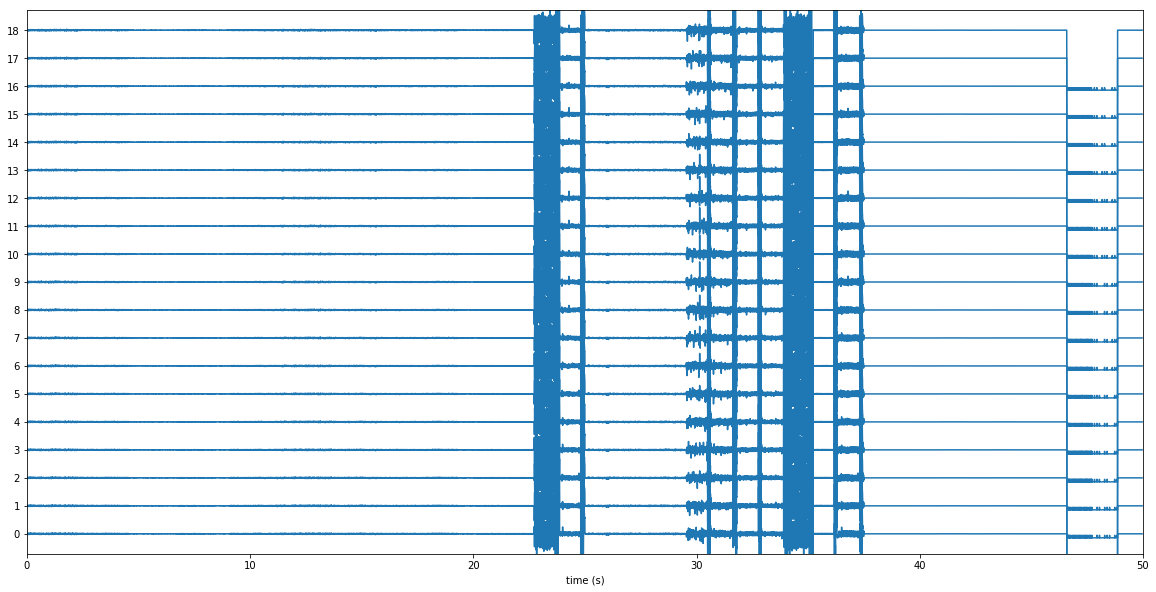

In [166]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=3.0)

Sample from one Epoch Before

In [181]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i-1) + "-real-rG-long.npy"

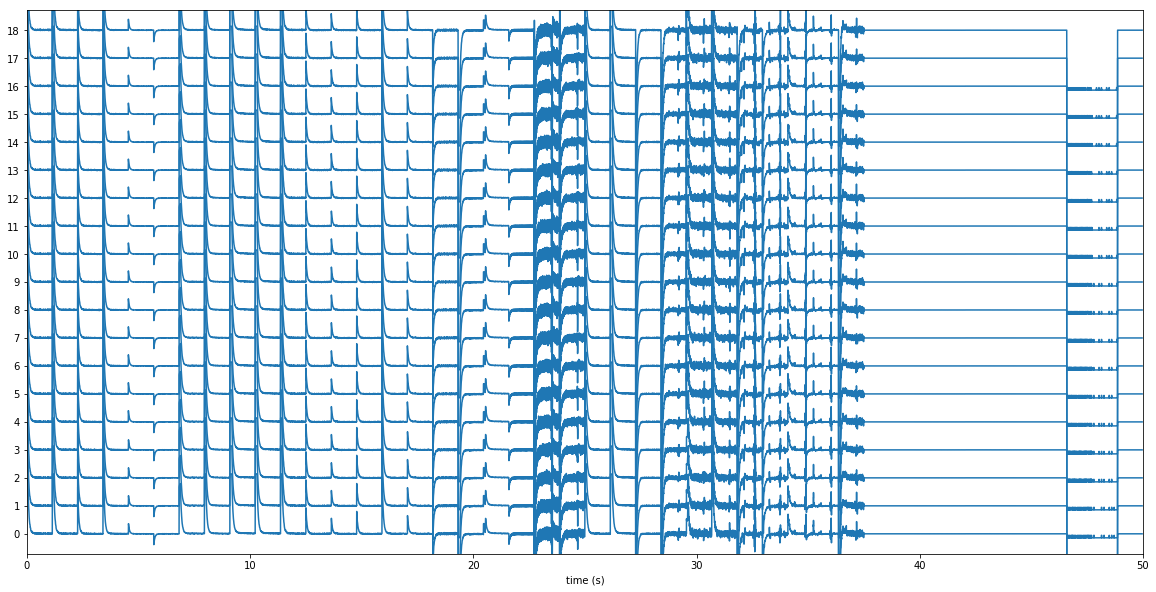

In [182]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=3.0)

#### A Fake EEG

In [175]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i) + "-fake-rG-long.npy"

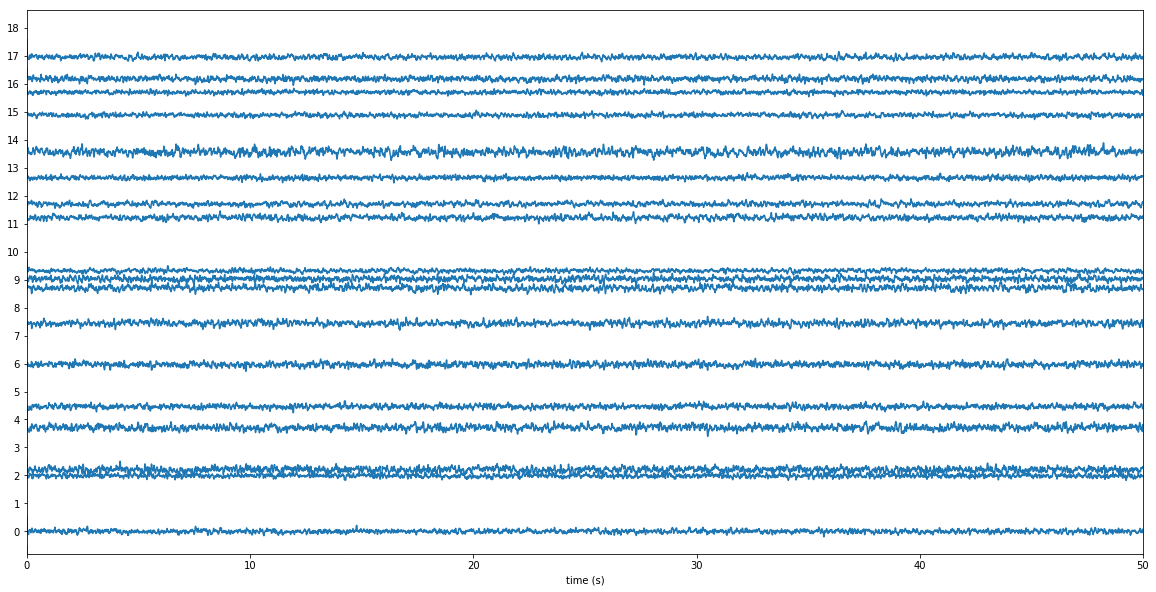

In [180]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=2)

In [13]:
# filename = "/Users/DanielLongo 1/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf"
filename = "/Users/DanielLongo 1/Desktop/eegML/eeg-hdfstorage/data/spasms.eeghdf"

# "/Users/DanielLongo 1/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf"

In [14]:
open(filename)

<_io.TextIOWrapper name='/Users/DanielLongo 1/Desktop/eegML/eeg-hdfstorage/data/spasms.eeghdf' mode='r' encoding='UTF-8'>

In [17]:
signals = load_eeg_file(filename)

In [19]:
signals

<HDF5 dataset "signals": shape (36, 446000), type "<i2">

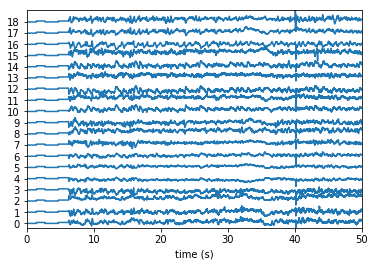

In [29]:
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=2)

### Old

In [ ]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(i) + suffix + ".npy"

In [90]:
hf = h5py.File('data1.h5', 'w')

In [91]:
signals = hf.create_dataset('generated', data=generated)

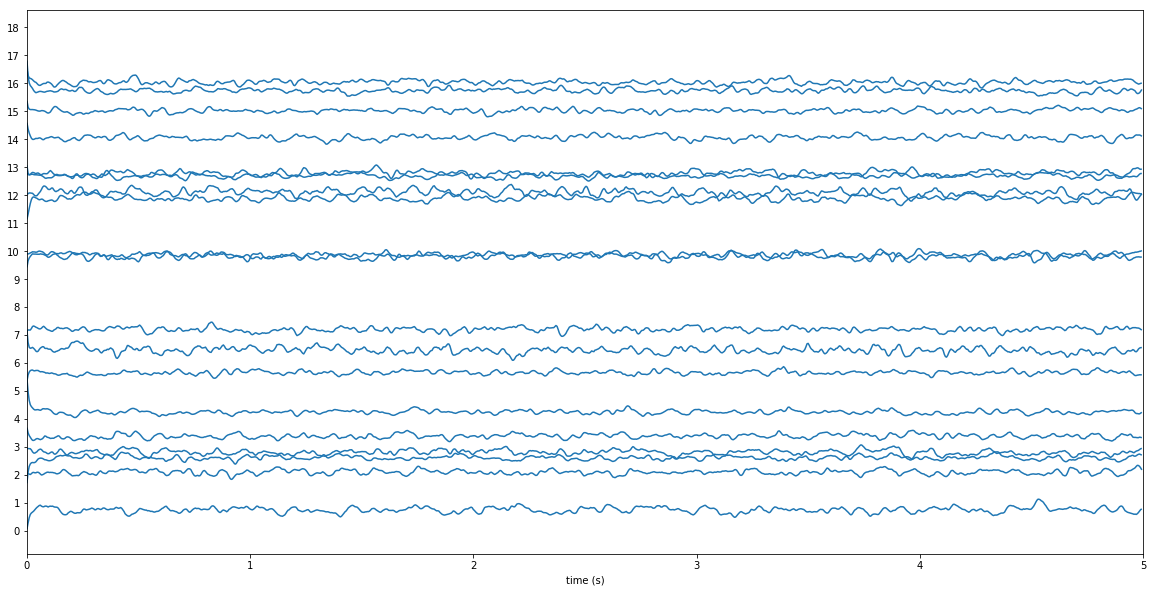

In [92]:
stacklineplot.show_epoch_centered(signals, 0,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=200,
                        ylabels=list(range(n_sensors)), yscale=3.0)